# 1. Import libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Settings for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

# 2. Load the dataset


In [25]:
df = pd.read_csv('/content/train.csv')

# 3. Basic Exploration

In [26]:
print("--- Dataset Information ---")
print(df.info())

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [27]:
print("\n--- Statistical Summary ---")
print(df.describe())


--- Statistical Summary ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [28]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# 4. Univariate Analysis

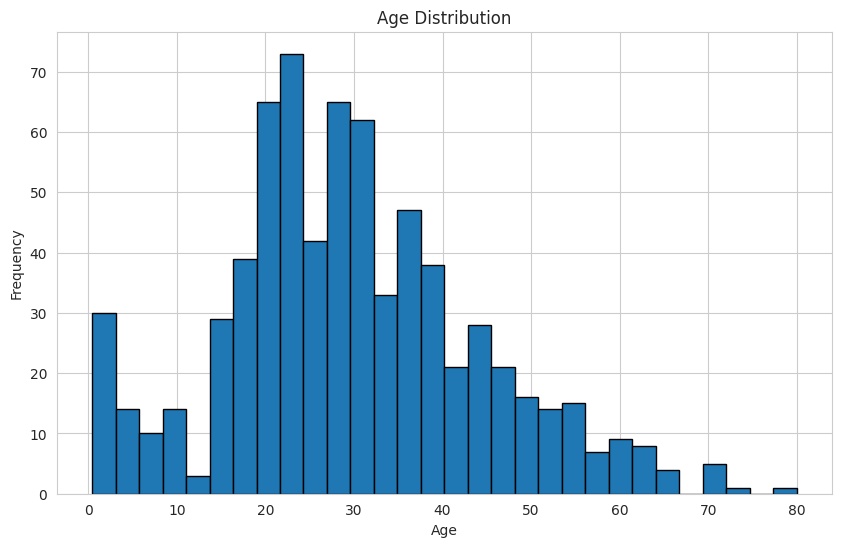

In [29]:
# Age Distribution
plt.figure()
df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

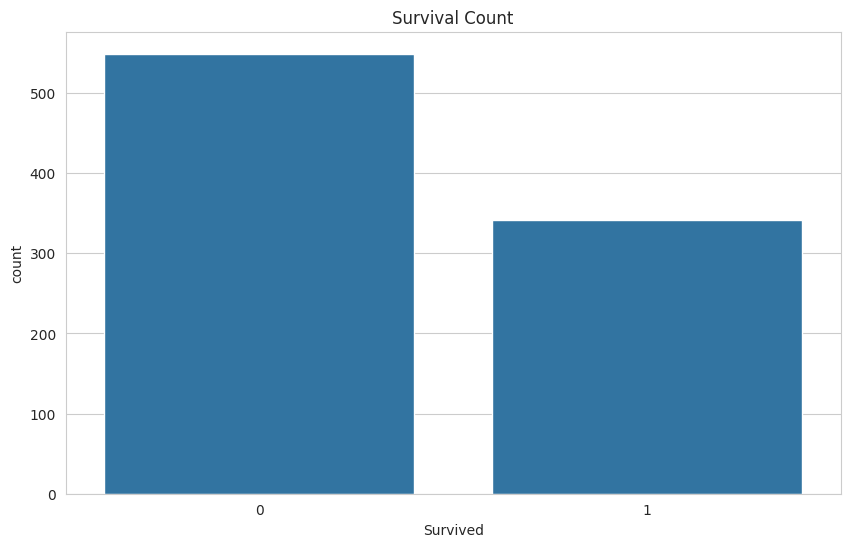

In [30]:
# Survived Count
plt.figure()
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

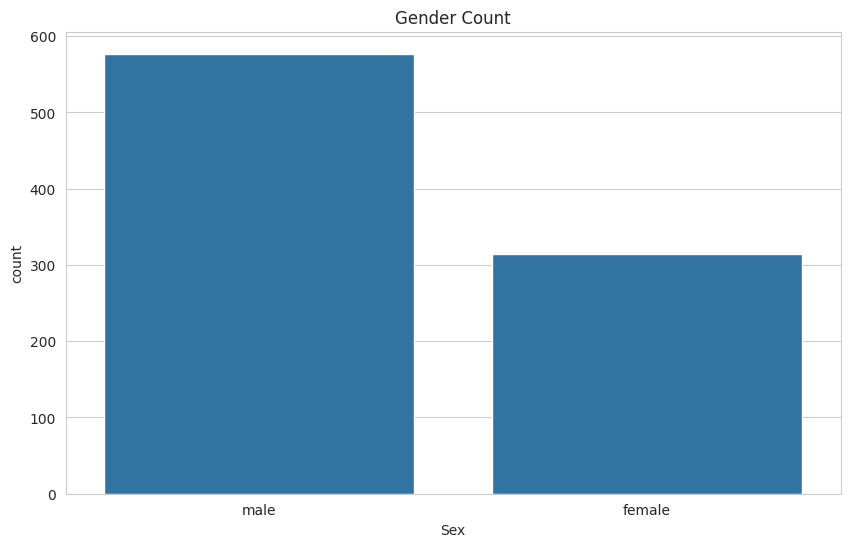

In [31]:
# Sex Count
plt.figure()
sns.countplot(x='Sex', data=df)
plt.title('Gender Count')
plt.show()

# 5. Bivariate Analysis

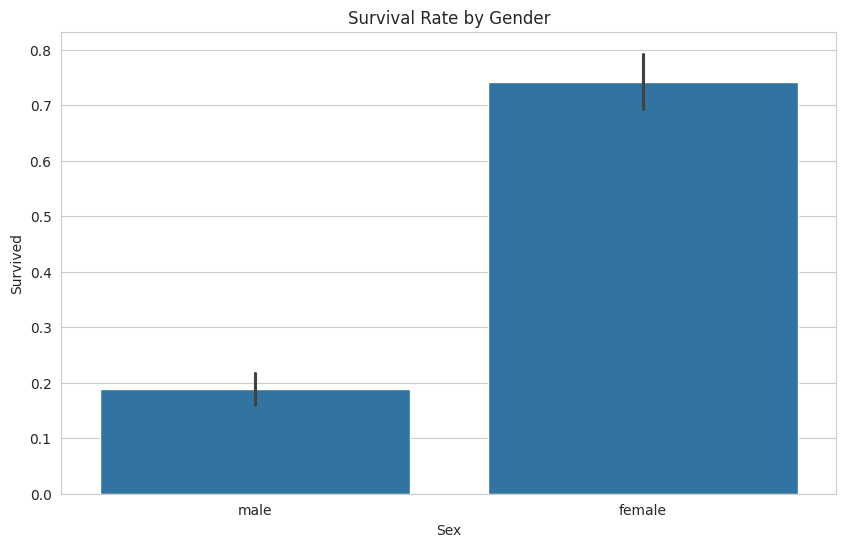

In [32]:
# Survival by Gender
plt.figure()
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

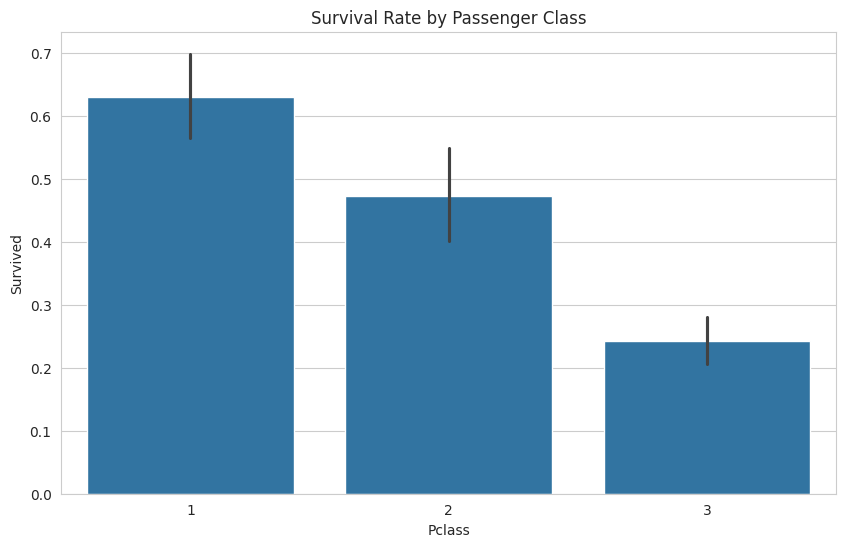

In [33]:
# Survival by Passenger Class
plt.figure()
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


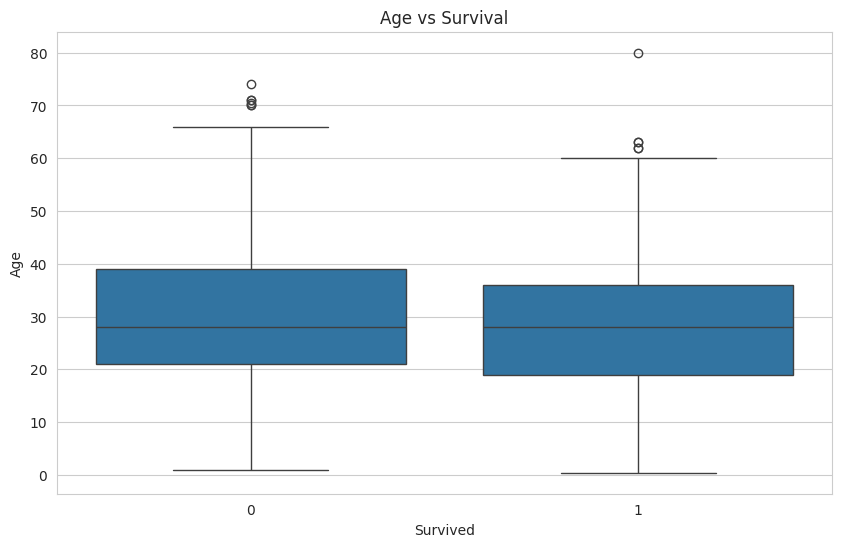

In [34]:
# Age vs Survived
plt.figure()
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

# 6. Multivariate Analysis

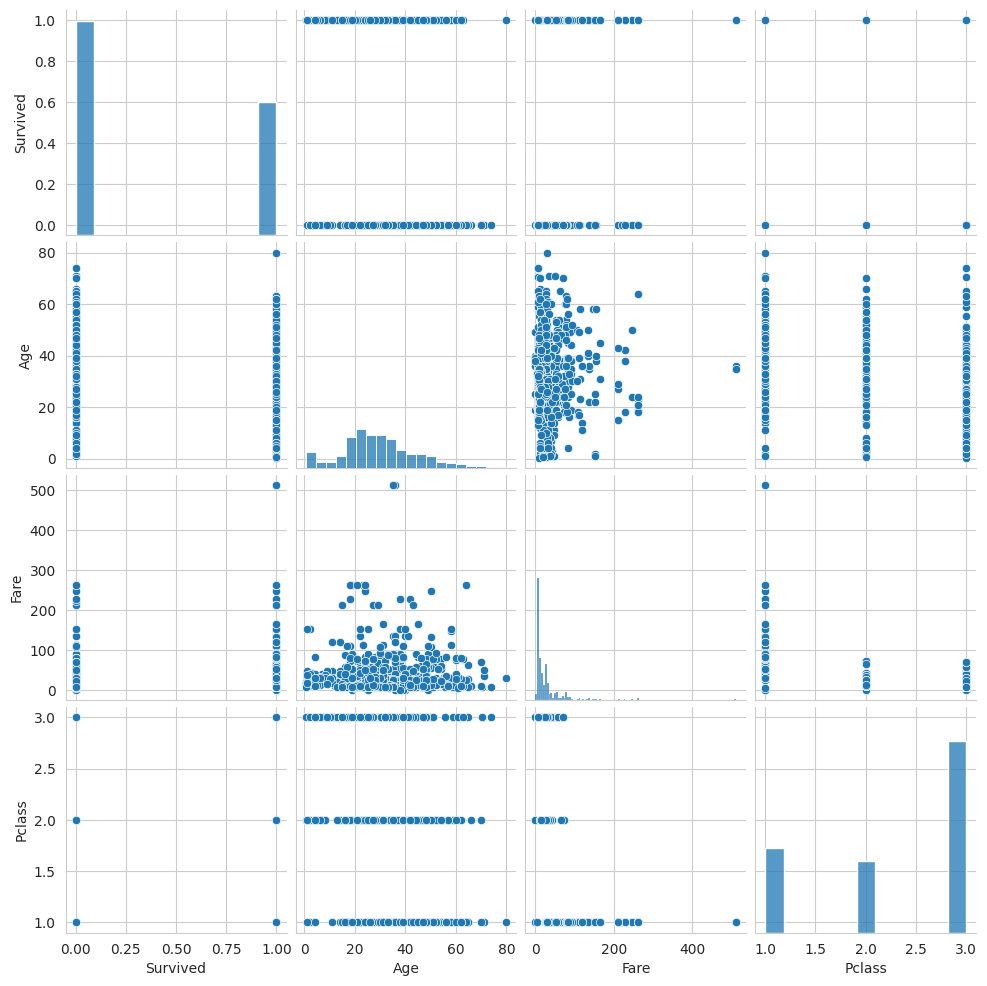

In [35]:
# Pairplot
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']])
plt.show()

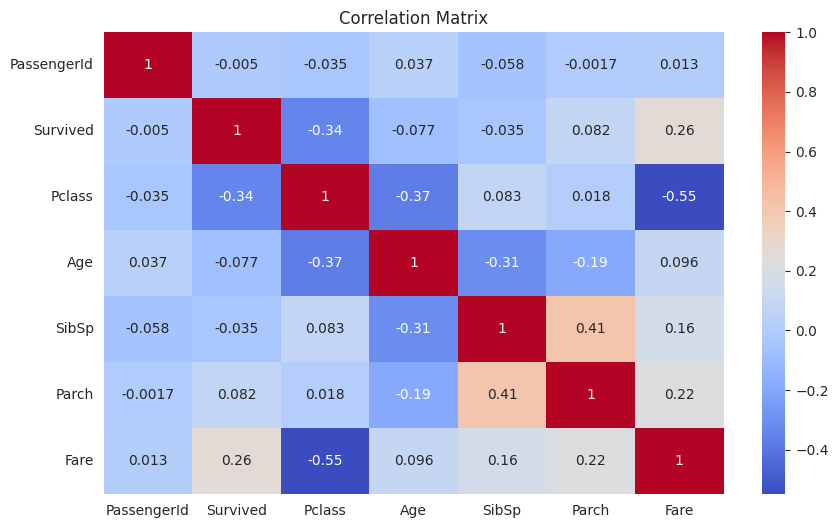

In [36]:
# Heatmap of Correlations
plt.figure()
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm') # Select only numeric columns
plt.title('Correlation Matrix')
plt.show()


# 7. Observations (for report)

In [37]:
print("""
Observations:
- Females had higher survival rates compared to males.
- Younger passengers tended to survive more.
- 1st Class passengers had higher survival rates.
- Fare and Pclass show strong negative correlation.
- Some missing values in Age and Cabin.
""")


Observations:
- Females had higher survival rates compared to males.
- Younger passengers tended to survive more.
- 1st Class passengers had higher survival rates.
- Fare and Pclass show strong negative correlation.
- Some missing values in Age and Cabin.



# 8. Handling Skewed Data (Optional)

In [38]:
print("\n--- Handling Skewed Data ---")
print(f"Original Fare Skewness: {df['Fare'].skew()}")


--- Handling Skewed Data ---
Original Fare Skewness: 4.787316519674893


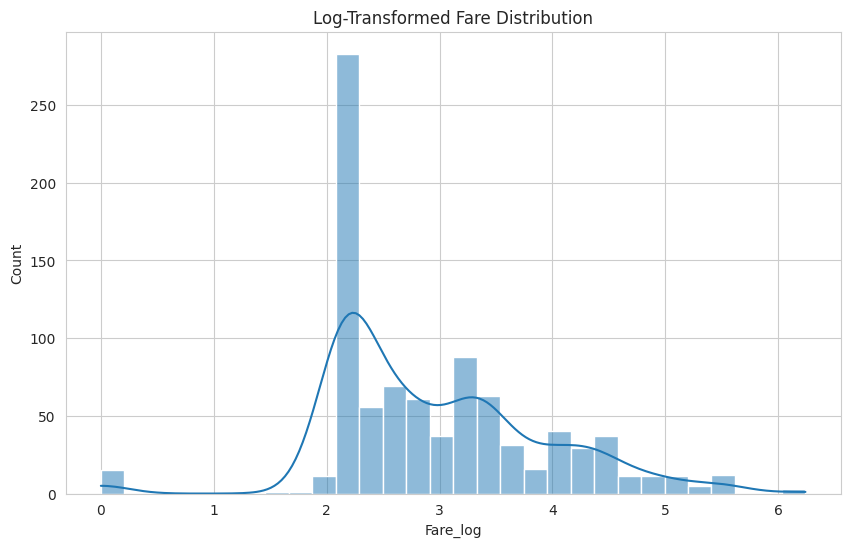

In [39]:
# Apply log transformation
# Avoiding log(0) by using log1p
if df['Fare'].skew() > 1:
    df['Fare_log'] = np.log1p(df['Fare'])
    plt.figure()
    sns.histplot(df['Fare_log'], bins=30, kde=True)
    plt.title('Log-Transformed Fare Distribution')
    plt.show()